In [4]:
%store -r __impC

In [5]:
__impC

In [6]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head()

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  714 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked             889 non-null    object 
 12  cabin_fill           891 non-null    object 
 13  encode_cf            891 non-null    int32  
 14  Cabin_Survival_rate  891 non-null    float64
dtypes: float64(3), int32(1), int64(5), objec

In [ ]:
train[(train['Pclass']==3)& (train['SibSp']==1)]['Age']

In [ ]:
train[train['Pclass']==3]['SibSp'].unique()

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
sns.boxplot(x=train['Pclass'],y=train['Age'])
yticks = plt.yticks(np.arange(0,80,2))

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
sns.boxplot(x=train['Pclass'],y=train['Age'],hue=train['SibSp'])
yticks = plt.yticks(np.arange(0,80,2))

In [ ]:
def age_fill(c):
    age = c[0]
    pclass = c[1]
    sibsp = c[2]
    
    if pd.isnull(age) == True:
        if pclass == 1:
            if sibsp == 1:
                return 38
            elif sibsp == 2:
                return 44
            elif sibsp == 3:
                return 23
            else:
                return 37
            
        elif pclass == 2:
            if sibsp == 0:
                return 30
            elif sibsp == 2:
                return 23
            else:
                return 29
            
        elif pclass == 3:
            if sibsp == 2:
                return 19
            elif sibsp == 3 or 4:
                return 6
            elif sibsp == 5:
                return 11
            elif sibsp == 8:
                return 11
            else:
                return 25
        
        
    else:
        return age

In [ ]:
X = train.copy()

In [ ]:
X['Age'] = X[['Age','Pclass','SibSp']].apply(lambda x:age_fill(x),axis=1)

In [ ]:
X.info()

In [ ]:
X['Cabin'].unique()

In [ ]:
X[X['Cabin'].isnull() == True]

In [ ]:
sns.countplot(X[X['Cabin'].isnull() == True]['Survived'])

In [ ]:
sns.countplot(X[X['Cabin'].isnull() == False]['Survived'])

In [ ]:
X['is_Cabin'] = X['Cabin']

In [ ]:
X['is_Cabin'] = X['is_Cabin'].fillna(0)

In [ ]:
X['is_Cabin'].unique()

In [27]:
def fill_iscabin(value):
    if value != -999:
        return value[0]
    else:
        return 'Z'      

In [ ]:
X['is_Cabin'] = X['is_Cabin'].apply(fill_iscabin)

In [ ]:
X['is_Cabin']

In [ ]:
X.corr()

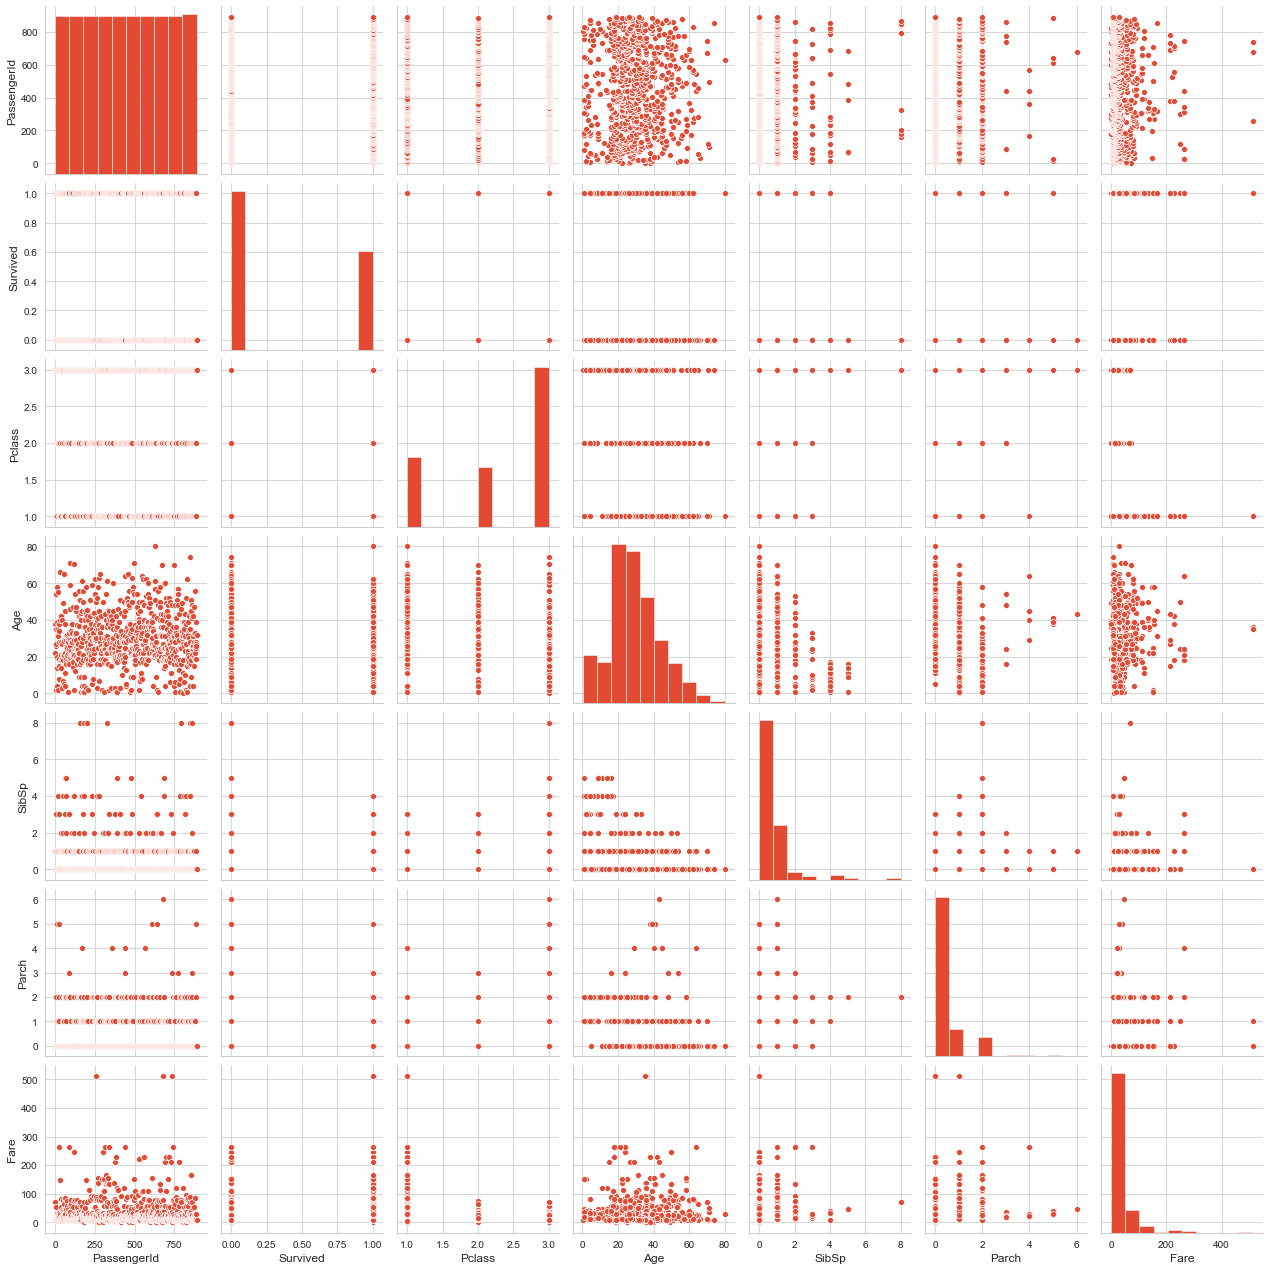

In [9]:
sns.pairplot(train)

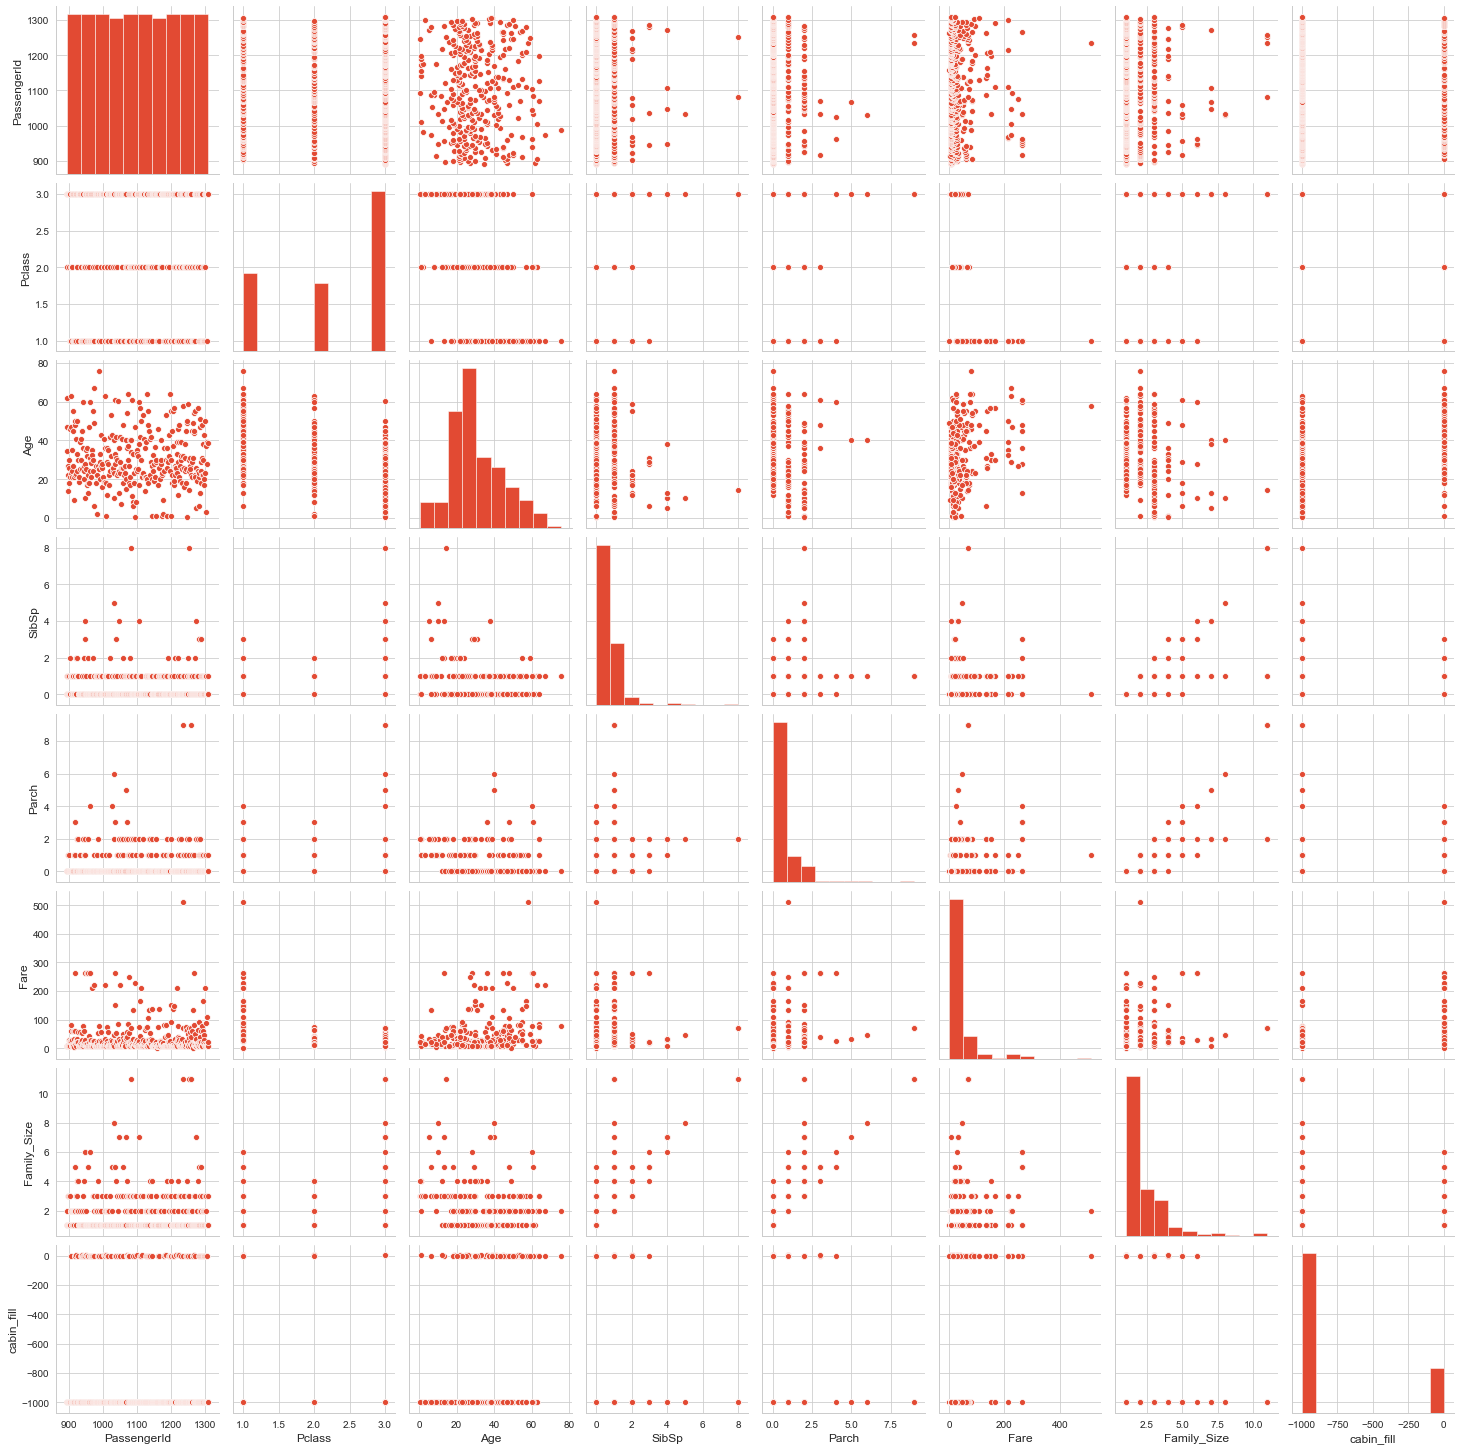

In [157]:
sns.pairplot(test)

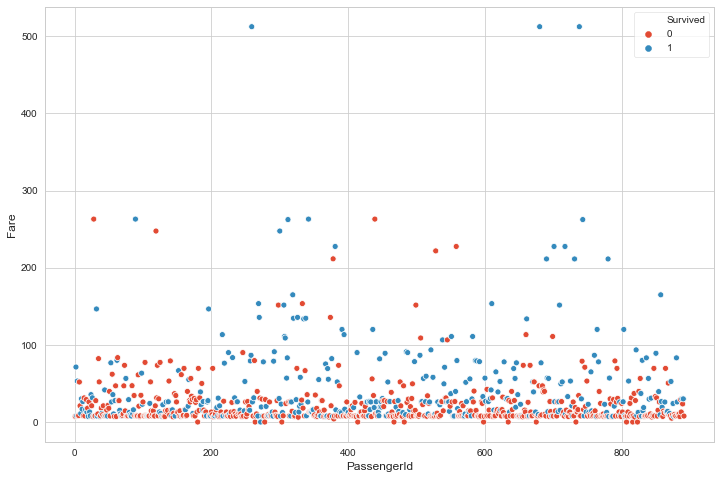

In [10]:
sns.scatterplot(train['PassengerId'],train['Fare'],hue=train['Survived'])

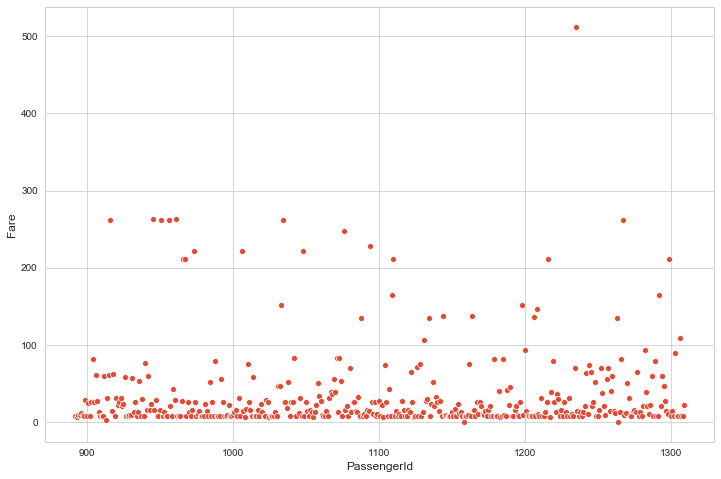

In [11]:
sns.scatterplot(test['PassengerId'],test['Fare'])

In [12]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

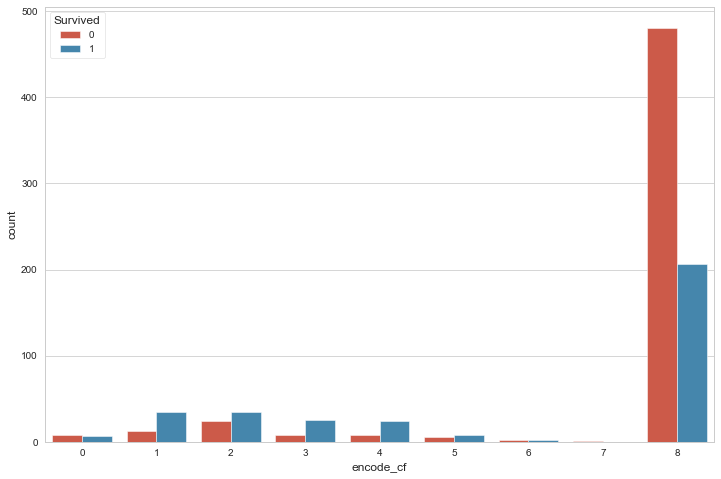

In [36]:
sns.countplot(train['encode_cf'],hue=train['Survived'])

In [28]:
train['cabin_fill'] = train['Cabin'].fillna(-999)

In [137]:
test['cabin_fill'] = test['Cabin'].fillna(-999)

In [138]:
test['cabin_fill'] = test['cabin_fill'].apply(fill_iscabin)

In [30]:
encoder = LabelEncoder()

In [34]:
train['encode_cf'] = encoder.fit_transform(train['cabin_fill'].values)

In [107]:
train[train['encode_cf'] == 7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_fill,encode_cf,Cabin_Survival_rate
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T,7,0.0


In [108]:
train['cabin_fill'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [44]:
x1 = train.groupby('encode_cf').count()['PassengerId']

In [104]:
train.groupby('encode_cf').count()['PassengerId']

encode_cf
0     15
1     47
2     59
3     33
4     32
5     13
6      4
7      1
8    687
Name: PassengerId, dtype: int64

In [82]:
train[train['Survived'] == 0].groupby('encode_cf').count()['PassengerId']

encode_cf
0      8
1     12
2     24
3      8
4      8
5      5
6      2
7      1
8    481
Name: PassengerId, dtype: int64

In [90]:
sr=[]
for i in range(9):
    sr.append(1-(x2[i]/x1[i]))

In [91]:
for i in range(9):
    sr[i]=round(sr[i],2)

In [92]:
sr = pd.DataFrame(sr,index=range(9))

In [93]:
sr = sr.reset_index()

In [96]:
sr

,0,1
0,0,0.47
1,1,0.74
2,2,0.59
3,3,0.76
4,4,0.75
5,5,0.62
6,6,0.50
7,7,0.00
8,8,0.30


In [100]:
def cabin_survival_rate(c,sr):
    for i in range(9):
        if c == sr[0][i]:
            return sr[1][i]    

In [101]:
train['Cabin_Survival_rate'] = train['encode_cf'].apply(lambda x : cabin_survival_rate(x,sr))

In [102]:
train['Cabin_Survival_rate']

0      0.30
1      0.59
2      0.30
3      0.59
4      0.30
       ... 
886    0.30
887    0.74
888    0.30
889    0.59
890    0.30
Name: Cabin_Survival_rate, Length: 891, dtype: float64

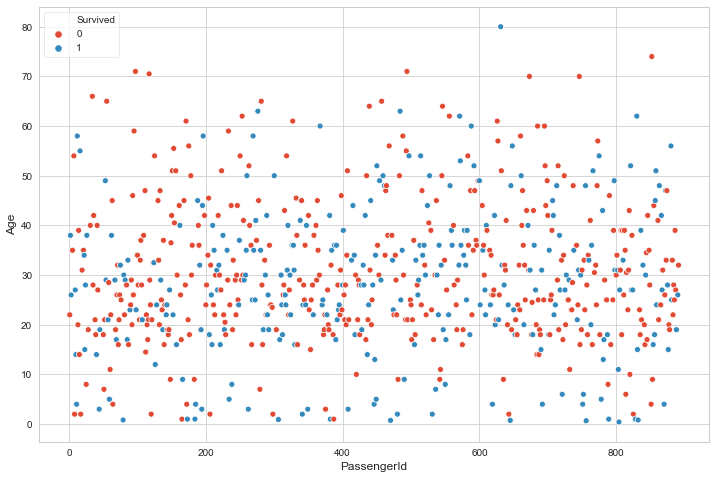

In [111]:
sns.scatterplot(train['PassengerId'],train['Age'],hue=train['Survived'])

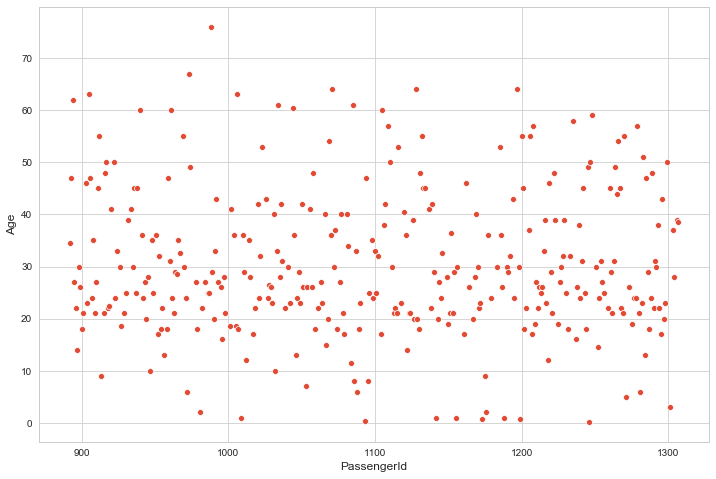

In [112]:
sns.scatterplot(test['PassengerId'],test['Age'])

In [116]:
train.corr()['Age']

PassengerId            0.036847
Survived              -0.077221
Pclass                -0.369226
Age                    1.000000
SibSp                 -0.308247
Parch                 -0.189119
Fare                   0.096067
encode_cf             -0.267270
Cabin_Survival_rate    0.240388
Name: Age, dtype: float64

In [126]:
test.corr()['Age']

PassengerId   -0.034102
Pclass        -0.492143
Age            1.000000
SibSp         -0.091587
Parch         -0.061249
Fare           0.337932
Name: Age, dtype: float64

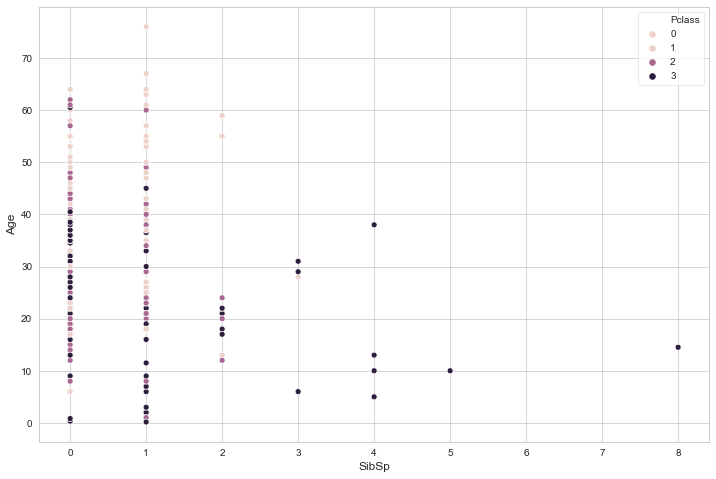

In [119]:
sns.scatterplot(test['SibSp'],test['Age'],hue=test['Pclass'])

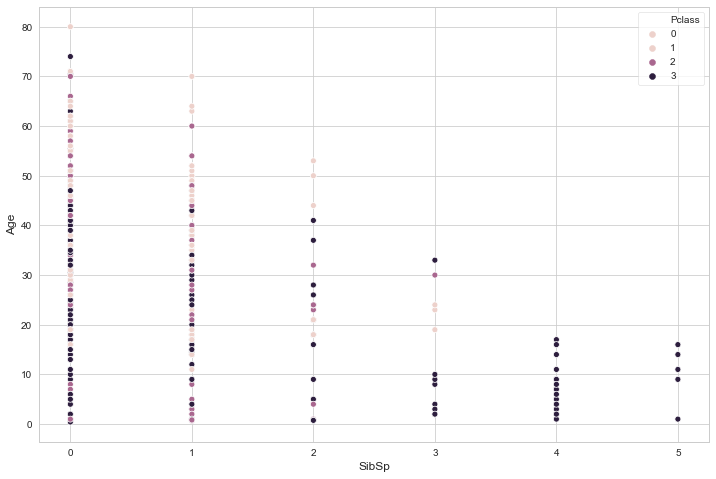

In [120]:
sns.scatterplot(train['SibSp'],train['Age'],hue=train['Pclass'])

In [121]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [125]:
def family_aboard(c):
    sib = c[0]
    par_chi = c[1]
    return sib+par_chi+1
train['Family_Size'] = train[['SibSp','Parch']].apply(family_aboard,axis=1) 

In [127]:
test['Family_Size'] = test[['SibSp','Parch']].apply(family_aboard,axis=1) 

In [164]:
train.corr()['Pclass']

PassengerId           -0.035144
Survived              -0.338481
Pclass                 1.000000
Age                   -0.369226
SibSp                  0.083081
Parch                  0.018443
Fare                  -0.549500
cabin_fill            -0.725479
encode_cf              0.746616
Cabin_Survival_rate   -0.696908
Family_Size            0.065997
Name: Pclass, dtype: float64

In [176]:
test.corr()['Pclass']

PassengerId   -0.026751
Pclass         1.000000
Age           -0.492143
SibSp          0.001087
Parch          0.018721
Fare          -0.577147
Family_Size    0.012736
cabin_fill    -0.690508
Name: Pclass, dtype: float64

In [132]:
def cat_cabin(value):
    l1 = ['B','C','D','E']
    l2 = ['A','F','G','T']
    if value in l1:
        return 1
    elif value in l2:
        return 2
    else:
        return -999

In [134]:
train['cabin_fill'] = train['cabin_fill'].apply(cat_cabin)

In [140]:
test['cabin_fill'] = test['cabin_fill'].apply(cat_cabin)

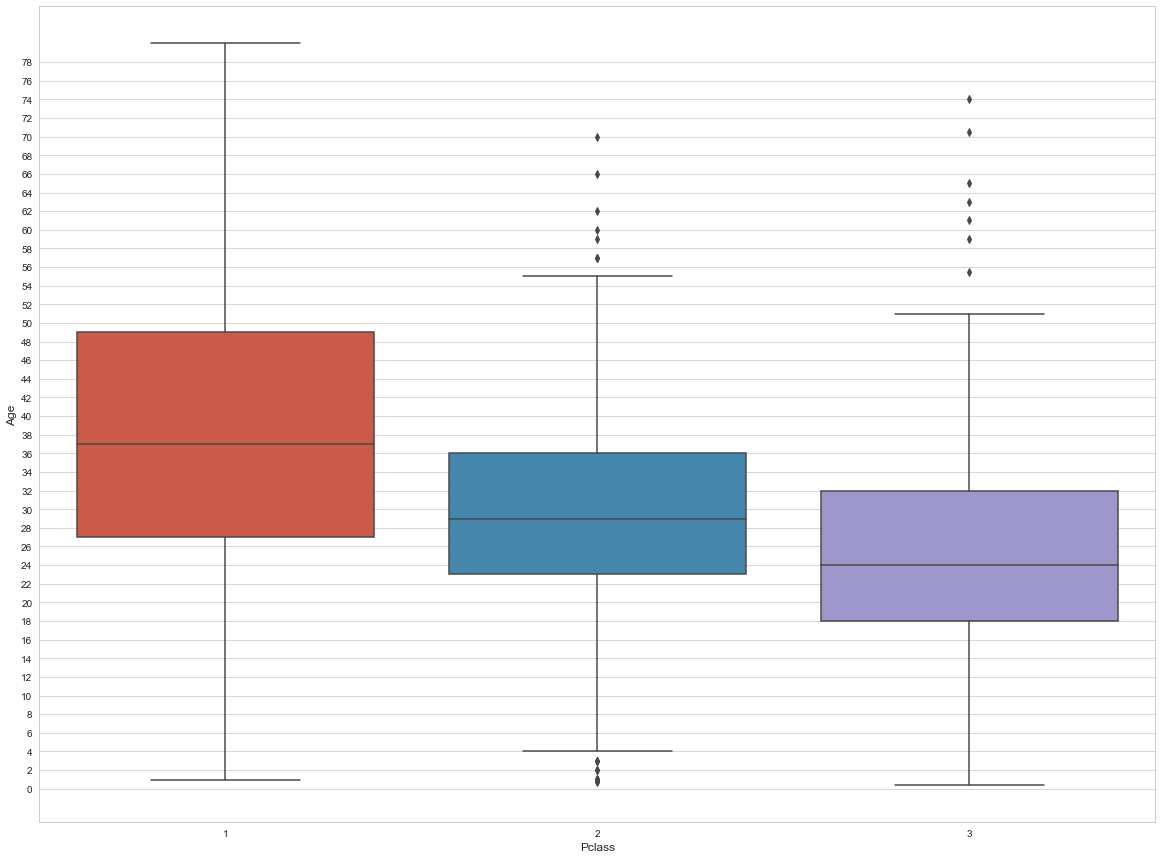

In [150]:
plt.figure(figsize = (20,15))
sns.boxplot(x=train['Pclass'],y=train['Age'])
yticks = plt.yticks(np.arange(0,80,step=2))

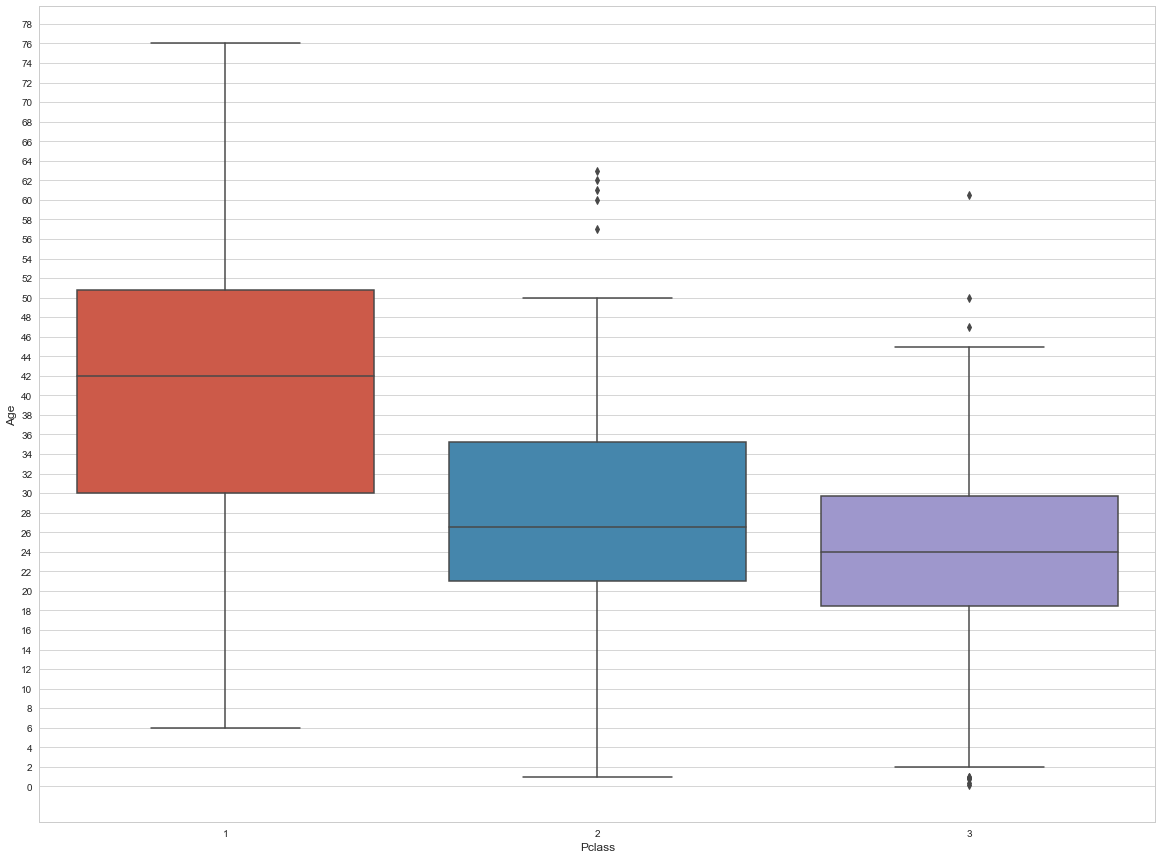

In [151]:
plt.figure(figsize = (20,15))
sns.boxplot(x=test['Pclass'],y=test['Age'])
yticks = plt.yticks(np.arange(0,80,step=2))

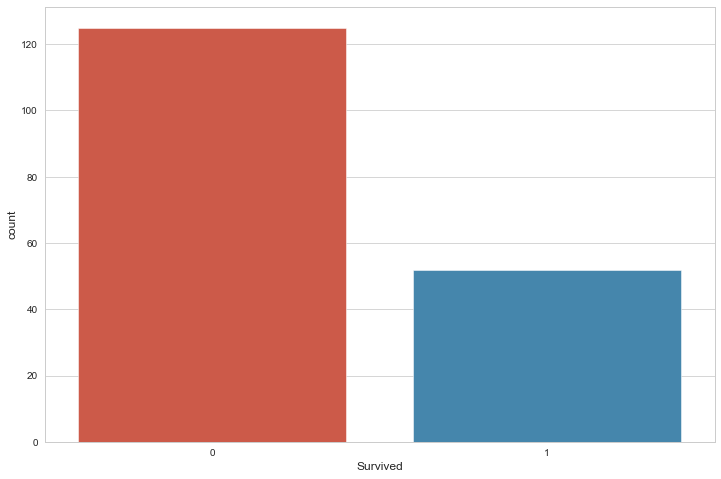

In [154]:
sns.countplot(train[pd.isna(train['Age']) == True]['Survived'])

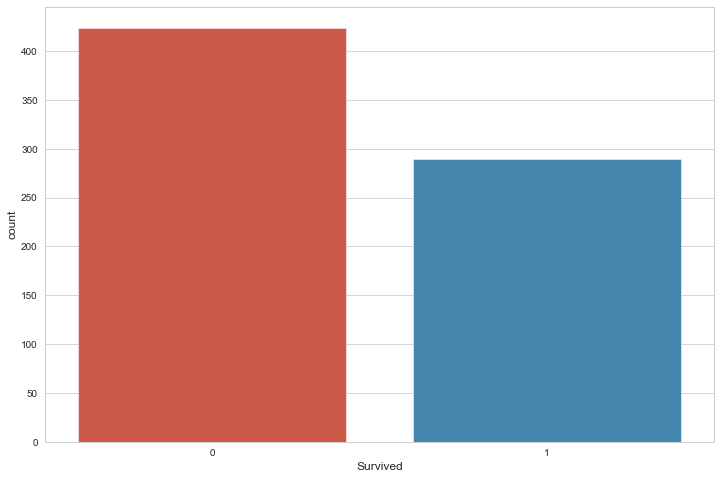

In [156]:
sns.countplot(train[pd.isna(train['Age']) == False]['Survived'])

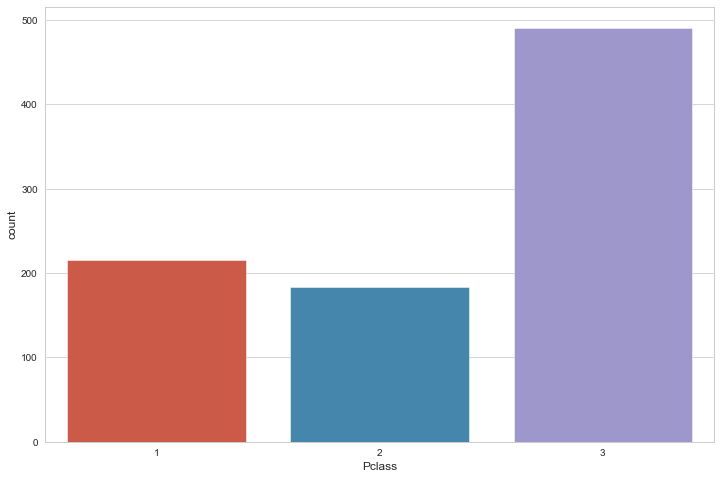

In [167]:
sns.countplot(train['Pclass'])

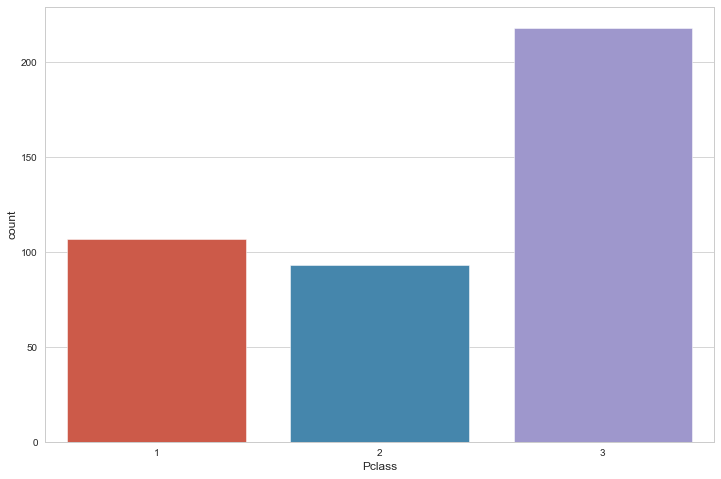

In [166]:
sns.countplot(test['Pclass'])

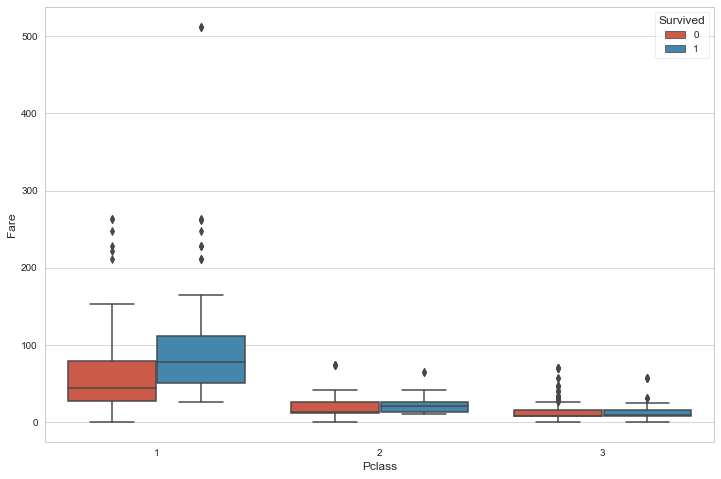

In [174]:
sns.boxplot(train['Pclass'],train['Fare'],hue=train['Survived'])

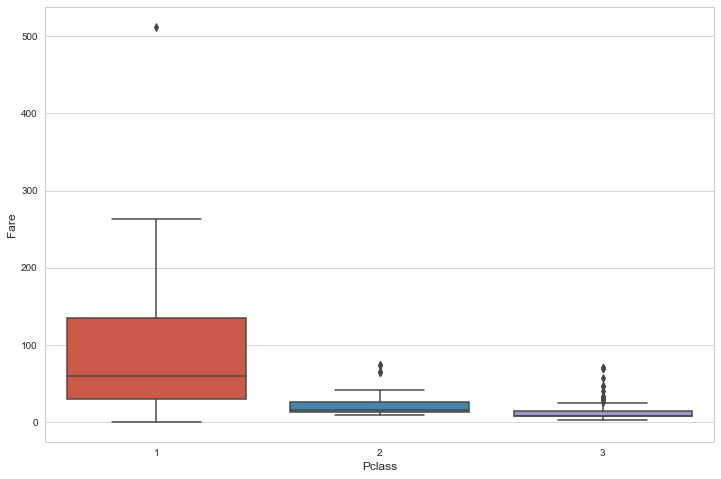

In [175]:
sns.boxplot(test['Pclass'],test['Fare'])

In [185]:
train[(train['Fare'] < 100) & (train['Survived'] == 1)].count()[0]

303

In [186]:
train[(train['Fare'] < 100) & (train['Survived'] == 0)].count()[0]

535

In [193]:
train[(train['Fare'] > 100) & (train['Fare'] < 300) & (train['Survived'] == 1)].count()[0]

36

In [194]:
train[(train['Fare'] > 100) & (train['Fare'] < 300) & (train['Survived'] == 0)].count()[0]

14

In [190]:
train[(train['Fare'] > 300) & (train['Survived'] == 1)].count()[0]

3

In [191]:
train[(train['Fare'] > 300) & (train['Survived'] == 0)].count()[0]

0

In [192]:
test[(test['Fare'] < 100)].count()[0]

386

In [195]:
test[(test['Fare'] > 100) & (test['Fare'] < 300)].count()[0]

30

In [196]:
train[(train['Fare'] > 300)].count()[0]

3